In [49]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from code import inverse_problem as inv 
from code import direct_problem as direct 

In [50]:
r=np.logspace(-1,3,25)
param=[50,30,
       100,10,1,10,100,10,1,10,100,10,1,10,100,10,1,10,100,10,1,10,
       200]
method='U'

resistance=[]
for r_i in r:
    resistance.append(direct.calculate_apparent_resistance(param,method,r_i,10*int(1+r_i/200))) 

In [51]:
start=[[50,40,
       10,200,
       200]]


bound=[[(25,75), (15,50),
       (1,25), (100,1000),
       (100,250)]]

11.36689823953375
35.16027690610805 %


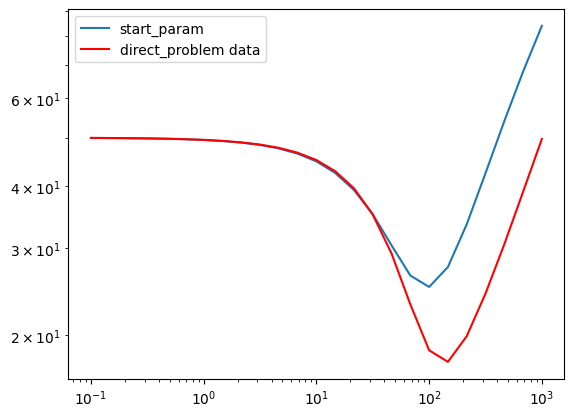

In [52]:
rk_start=[]
for r_i in r:
    rk_start.append(direct.calculate_apparent_resistance(start[0],method,r_i,num_of_zeros=10*int(1+r_i/200)))
rk_start=np.array(rk_start)
plt.loglog(r,rk_start, label='start_param')
plt.loglog(r,resistance,c='red', label='direct_problem data')
plt.legend()
print(inv.RMSE(rk_start,resistance))
print(inv.RMSPE(rk_start,resistance),'%')

In [53]:
N_layers_list=[3]
loss='RMSPE'
minim='L-BFGS-B'
inverse=inv.inverse_problem_solver(N_layers_list,method, np.array([r,resistance]).T, minimization_method=minim, loss_type=loss, start=start,boundaries=bound) 
results=inverse[0] # модели полученные из обратной задачи 
ind=inverse[1] #  индекс модели с наименьшим loss_N_layers в results
print(ind)

0


In [54]:
#Вывод количества слоёв в модели, её параметров и полученной ошибки
for i in range (len(N_layers_list)):
    print('\nnumber of layers= ', N_layers_list[i], '\nparam =', results[i].x, f'\nloss {loss} =', results[i].fun)


number of layers=  3 
param = [ 50.10638062  48.9428801    6.88779788 263.54321983 130.31815502] 
loss RMSPE = 0.6426805631320653


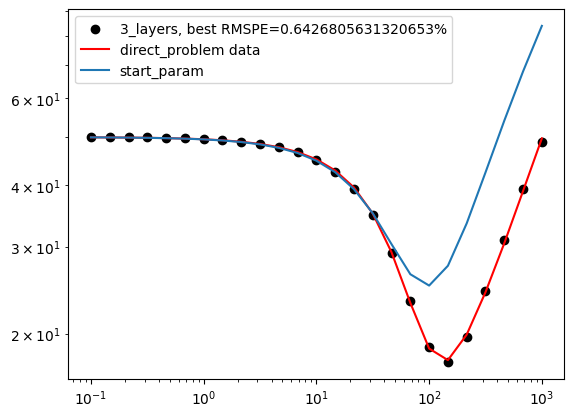

In [55]:
# Визуализация
t=''
if loss=="RMSPE": t='%'
for i in range(len(N_layers_list)):
    rk=[]
    for r_i in r:
        rk.append(direct.calculate_apparent_resistance(results[i].x,method,r_i,num_of_zeros=10*int(1+r_i/200)))
    rk=np.array(rk)
    if i==ind:
        plt.scatter(r,rk, c='black',label=f'{N_layers_list[i]}_layers, best {loss}={results[i].fun}{t}')
    else: plt.loglog(r,rk, label=f'{N_layers_list[i]}_layers')
plt.loglog(r,resistance,c='red', label='direct_problem data')
plt.loglog(r,rk_start, label='start_param')
plt.legend()

In [56]:
results[0].x

array([ 50.10638062,  48.9428801 ,   6.88779788, 263.54321983,
       130.31815502])